# Project 1: Image registration

**Contents:** <br>

- [Goal](#goal)<br>
- [Deliverables](#deliverables)<br>
- [Assessment](#assessment)<br>

- [Guided project work](#guided_work)<br>

    A. [Getting started](#getting_started)<br>
    - [Dataset](#dataset)<br>
    - [Selecting corresponding point pairs](#selecting_point_pairs)<br>
        
  B. [Point-based registration](#point-based_reg)<br>
    - [Point-based affine image registration](#affine)<br>
    - [Evaluation of point-based affine image registration](#evaluation)<br>
        
  C. [Intensity-based registration](#intensity-based_reg)<br>
    - [Comparing the results of different registration methods](#comparison)<br>

<div id="goal"></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

**Clarification:** Following the guided project work below, completing the programming tasks and answering the theory questions, is the minimal solution to this project. If accompanied by a suitable report, this will be graded with a ‘sufficient’ grade.

To achieve higher grades, you are expected to go beyond the minimal solution. You should use what you have implemented and the available data to come up with and answer a suitable research question. Write about this in your report.



## Goal
Develop Python code for point-based and intensity-based (medical) image registration. Use the developed code to perform image registration and evaluate and analyze the results.

The dataset you will be using in the first mini-project originates from the [MRBrainS medical image analysis challenge](http://mrbrains13.isi.uu.nl/). It consists of 30 traverse slices of MR brain scans with two different sequences: T1-weighted and T2-FLAIR (5 patients $\times$ 3 slices per patient $\times$ 2 modalities). Please see the [Getting started](#getting_started) assignment below for more details on the dataset.

<div id="deliverables"></div>

## Deliverables
Code and a report describing your implementation, results and analysis. There is no hard limit for the length of the report, however, concise and short reports are **strongly** encouraged. Aim to present your most important findings in the main body of the report and (if needed) any additional information in an appendix. The following report structure is suggested for the main body of the report:

1. Introduction
2. Methods
3. Results
4. Discussion

The introduction and result sections can be very brief in this case (e.g. half a page each). The discussion section should contain the analysis of the results. The report must be submitted as a single PDF file. The code must be submitted as a single archive file (e.g. zip or 7z) that is self-contained and can be used to reproduce the results in the report. 

Note that there is no single correct solution for the project. You have to demonstrate to the reader that you understand the methods that you have studied and can critically analyze the results of applying the methods. Below, you can find a set of assignments (guided project work) that will help you get started with the project work and, when correctly completed, will present you with a **minimal solution**. Solutions which go beyond these assignments are of course encouraged.

<div id="assessment"></div>

## Assessment
The rubric that will be used for assessment of the project work is given in [this table](https://github.com/tueimage/8dc00-mia/blob/master/rubric.md)

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
# if you want to use this, run  'conda install -c conda-forge scalene' for your conda env
%load_ext scalene 

from scalene import scalene_profiler
import sys
sys.path.append("../code")

Scalene extension successfully loaded. Note: Scalene currently only
supports CPU+GPU profiling inside Jupyter notebooks. For full Scalene
profiling, use the command line version.


<div id='guided_work'></div>

## Guided project work

<div id="getting_started"></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

### A. Getting started
As an introduction, you will get familiar with the dataset that will be used in the first mini-project and the control point selection tool that can be used to annotate corresponding points in pairs of related images. The annotated points can later be used to perform point-based registration and evaluation of the registration error.

<div id="dataset"></div>

### Dataset

The image dataset is located in the [image_data](https://github.com/tueimage/8dc00-mia/tree/master/data/image_data) subfolder of the code for the registration exercises and project. The image filenames have the following format: `{Patient ID}_{Slice ID}_{Sequence}.tif`. For example, the filename `3_2_t1.tif` is the second slice from a T1-weighted scan of the third patient. Every T1 slice comes in two versions: original and transformed with some random transformation that can be identified with the `_d` suffix in the filename. This simulates a registration problem where you have to register two image acquisitions of the same patient (note however that some of the transformations that were used to simulate the second set of images are not realistic for brain imaging, e.g. brain scans typically do not encounter shearing between consecutive acquisitions).

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 1*:

With this dataset we can define two image registration problems: T1 to T1 registration (e.g. register `3_2_t1_d.tif` to `3_2_t1.tif`) and T2 to T1 registration (e.g. register `3_2_t2.tif` to `3_2_t1.tif`). Which one of these can be considered inter-modal image registration and which one intra-modal image registration?

<div id="selecting_point_pairs"></div>

### Selecting corresponding point pairs

A function called `cpselect` is provided to select control points in two different images. This function provides two numpy arrays of cartesian coordinates, one array for each image, of points selected in the two images. The coordinate format is a numpy array with the X and Y on row 0 and 1 respectively, and each column being a point.

Calling the function will cause a new interactive window to pop up, where you will see your two images and some instructions.
For convenience, the instructions can also be found below:

* First select a point in Image 1 and then its corresponding point in Image 2. This pattern should be repeated for as many control points as you need. If you do not follow this pattern, the output arrays will be incorrect.
* Left Mouse Button to create a point. 
* Right Mouse Button/Delete/Backspace to remove the newest point. 
* Middle Mouse Button/Enter to finish placing points. 

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 1*:

Test the functionality of `cpselect` by running the following code example:

In [2]:
import registration_util as util

I_path = '../data/image_data/1_1_t1.tif'
Im_path = '../data/image_data/1_1_t1_d.tif'

X, Xm = util.cpselect(I_path, Im_path)

print('X:\n{}'.format(X))
print('Xm:\n{}'.format(Xm))

X:
[[143.8483871 ]
 [139.15677419]]
Xm:
[[145.70645161]
 [139.15677419]]


<div id="point-based_reg"></div>

## B. Point-based registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

<div id="affine"></div>

### Point-based affine image registration

From the provided dataset for this project, select one pair of T1 image slices (e.g. `3_2_t1.tif` and `3_2_t1_d.tif`) and use `my_cpselect` to select a set of corresponding points. Then, compute the affine transformation between the pair of images with `ls_affine` and apply it to the moving image using `image_transform`. 

Repeat the same for a pair of corresponding T1 and T2 slices (e.g. `3_2_t1.tif` and `3_2_t2.tif`).

<div id="evaluation"></div>

### Evaluation of point-based affine image registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/question_ico.png" width="42" height="42"></div> 

### *Question 2*:
Describe how you would estimate the registration error. (Hint: Should you use the same points that you used for computing the affine transformation to also compute the registration error?) How does the number of corresponding point pairs affect the registration error? Motivate all your answers.

<div id="intensity-based_reg"></div>

## C. Intensity-based registration

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

<div id="comparison"></div>

### Comparing the results of different registration methods

The following Python script (provided as `intensity_based_registration_demo()`) performs rigid intensity-based registration of two images using the normalized-cross correlation as a similarity metric:

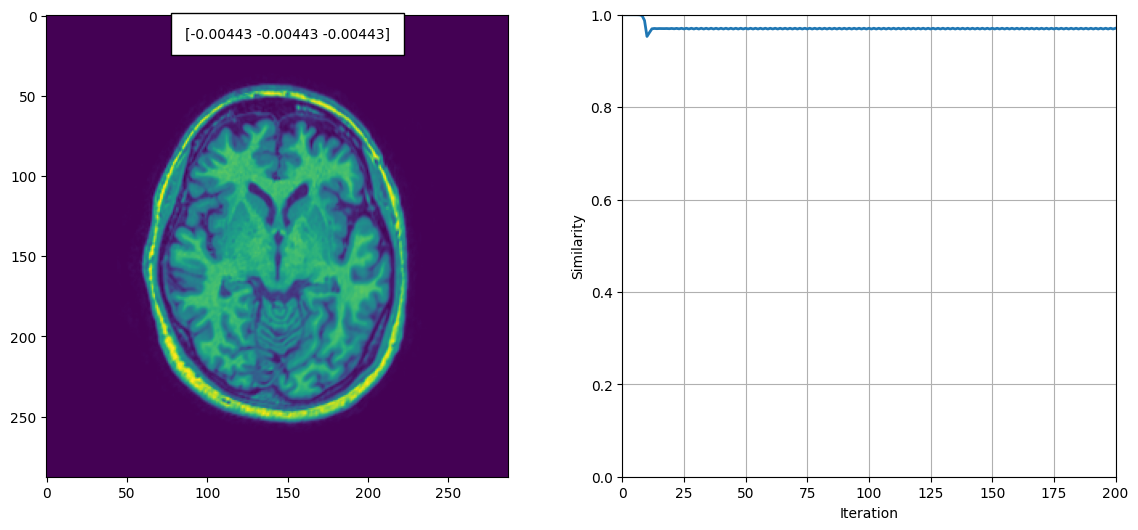

Final similarity of ca. [[0.97070895]]


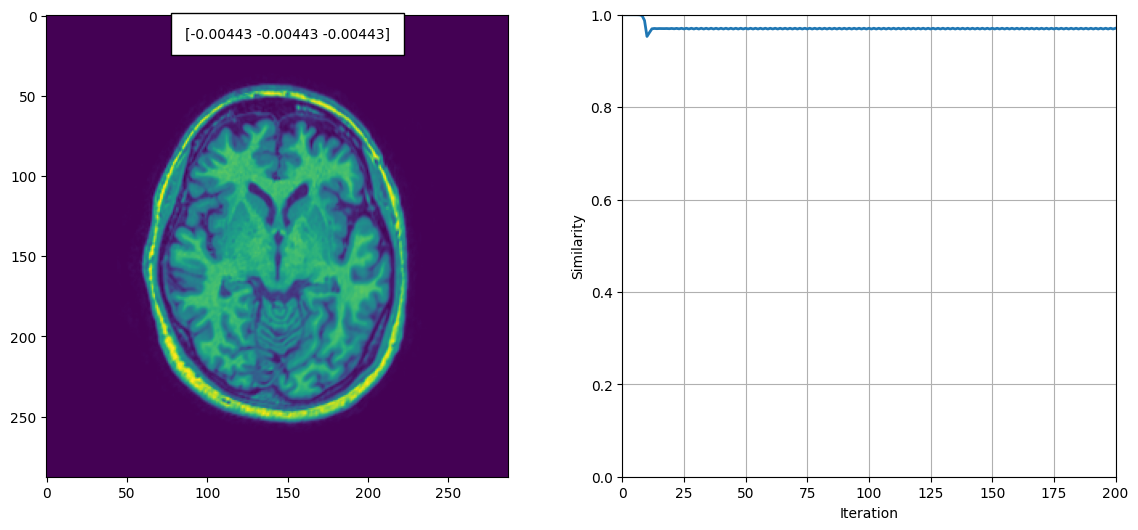

In [1]:
%matplotlib inline
import sys
sys.path.append("../code")
from registration_project import intensity_based_registration_demo

rigid_reg_cc_demo()

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 2*:

By changing the similarity function and the initial parameter vector, you can also use this script to perform affine registration and use mutual information as a similarity measure. Do not forget to also change the transformation for the visualization of the results.

Using the provided dataset and the functions that you have implemented in the exercises, perform the following series of experiments:

1. Rigid intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
2. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using normalized cross-correlation as a similarity measure.
3. Affine intensity-based registration of a T1 and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using normalized cross-correlation as a similarity measure.
4. Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) using mutual information as a similarity measure.
5. Affine intensity-based registration of a T1 slice and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) using mutual information as a similarity measure.

Describe, analyze and compare the results from each experiment. If a method fails, describe why you think it fails. Note that you will most likely have to try different values for the learning rate in each experiment in order to find the one that works best. 

In [12]:
# %%scalene
## Affine correlation test
%scrun --reduced-profile --profile-all
from registration import affine_corr
import matplotlib.pyplot as plt
import numpy as np
I = plt.imread('../data/image_data/1_1_t1.tif')
Im = plt.imread('../data/image_data/1_1_t1_d.tif')

x = np.array([0., 1., 1., 0., 0. ,0. ,0.])
C = affine_corr(I, Im, x, return_transform=False)
scalene_profiler.stop()

Scalene: Program did not run for long enough to profile.


In [6]:
## 1: Rigid intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) 
# using normalized cross-correlation as a similarity measure.
import sys
sys.path.append("../code")
from registration_project import rigid_reg_cc_demo

rigid_reg_cc_demo('../data/image_data/1_1_t1.tif','../data/image_data/1_1_t1_d.tif',False)

[0, 0, 0, 0, 1.0000000000000002]
[0, 0, 0, 1.0000000000000002, 1.0000000000000002]
[0, 0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002]
[0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 0.9999997555352644]
[1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 0.9999997555352644, 0.9999952380252086]
[1.0000000000000002, 1.0000000000000002, 0.9999997555352644, 0.9999952380252086, 0.9999651299947491]
[1.0000000000000002, 0.9999997555352644, 0.9999952380252086, 0.9999651299947491, 0.99974597366736]
Final similarity of ca. 0.99974597366736


In [4]:
## 2: Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) 
# using normalized cross-correlation as a similarity measure.
from registration_project import affine_reg_cc_demo

affine_reg_cc_demo('../data/image_data/1_1_t1.tif','../data/image_data/1_1_t1_d.tif',False)

Final similarity of ca. 0.9299874408059887


array([[1.        ],
       [0.9999991 ],
       [0.99996685],
       [0.99932876],
       [0.98638603],
       [0.91028222],
       [0.94867321],
       [0.92782117],
       [0.93068349],
       [0.93001718],
       [0.93003566],
       [0.92998217],
       [0.92997665],
       [0.93002837],
       [0.93007383],
       [0.92998378],
       [0.92997032],
       [0.93003452],
       [0.93009047],
       [0.92993772],
       [0.93015329],
       [0.93007826],
       [0.93012769],
       [0.93000126],
       [0.93004229],
       [0.92993046],
       [0.93018619],
       [0.93009899],
       [0.93016065],
       [0.93007339],
       [0.93013234],
       [0.9300046 ],
       [0.93002419],
       [0.92998386],
       [0.92996997],
       [0.93003311],
       [0.93009385],
       [0.9298981 ],
       [0.93021396],
       [0.93006099],
       [0.93007812],
       [0.93000097],
       [0.93003347],
       [0.92999289],
       [0.92999812],
       [0.9300702 ],
       [0.93013669],
       [0.930

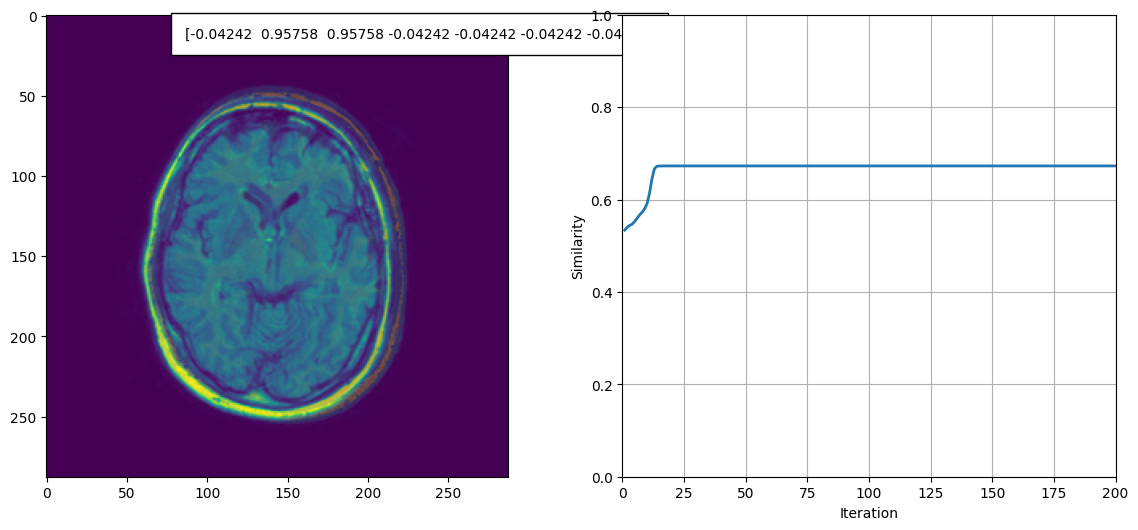

Final similarity of ca. [[0.6727039]]


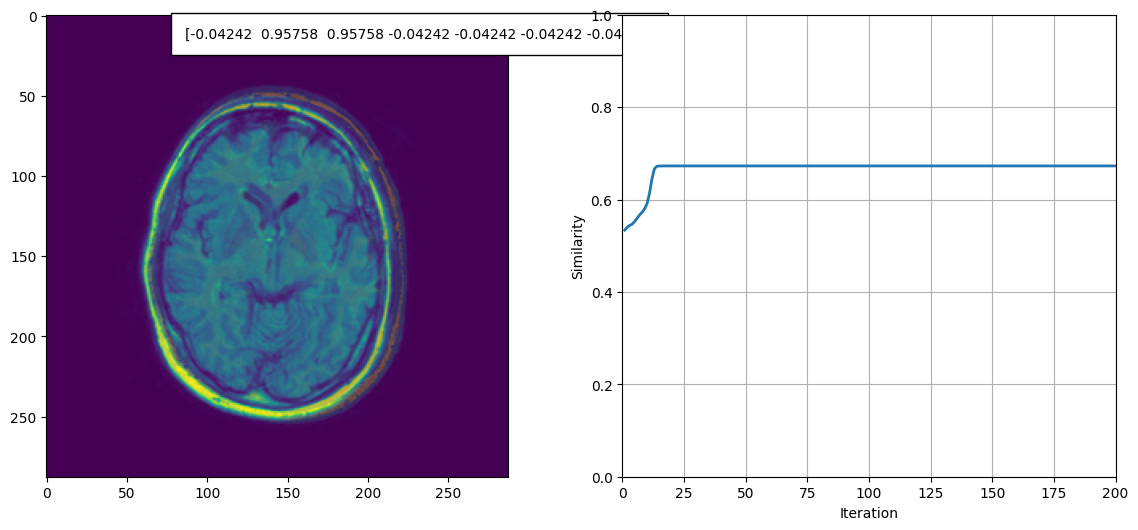

In [3]:
## 3: Affine intensity-based registration of a T1 and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) 
# using normalized cross-correlation as a similarity measure.
import sys
sys.path.append("../code")
from registration_project import affine_reg_cc_demo

affine_reg_cc_demo('../data/image_data/1_1_t1.tif','../data/image_data/1_1_t2.tif')

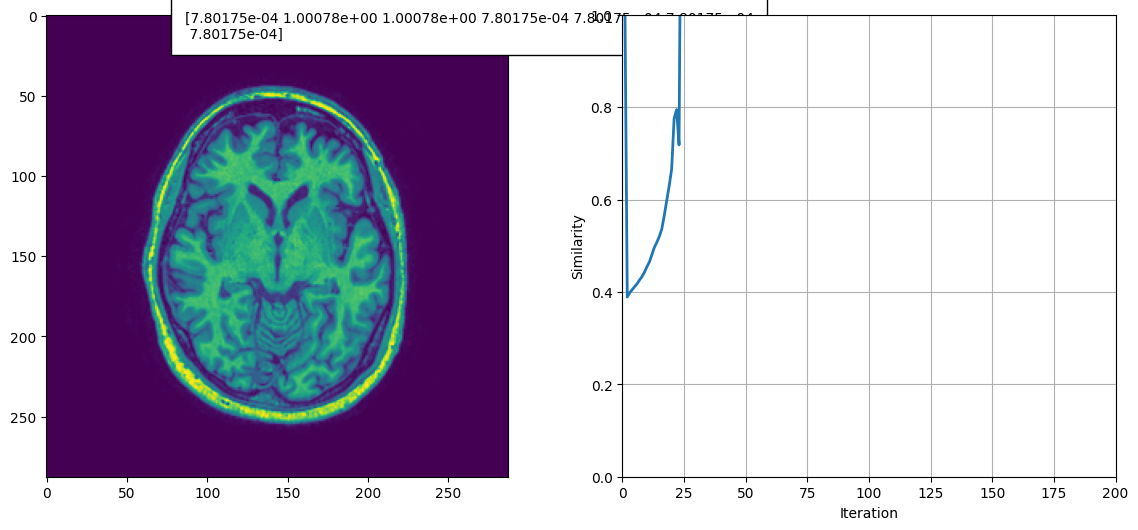

Final similarity of ca. 1.503555967576574 with variance 0.09573801919278936


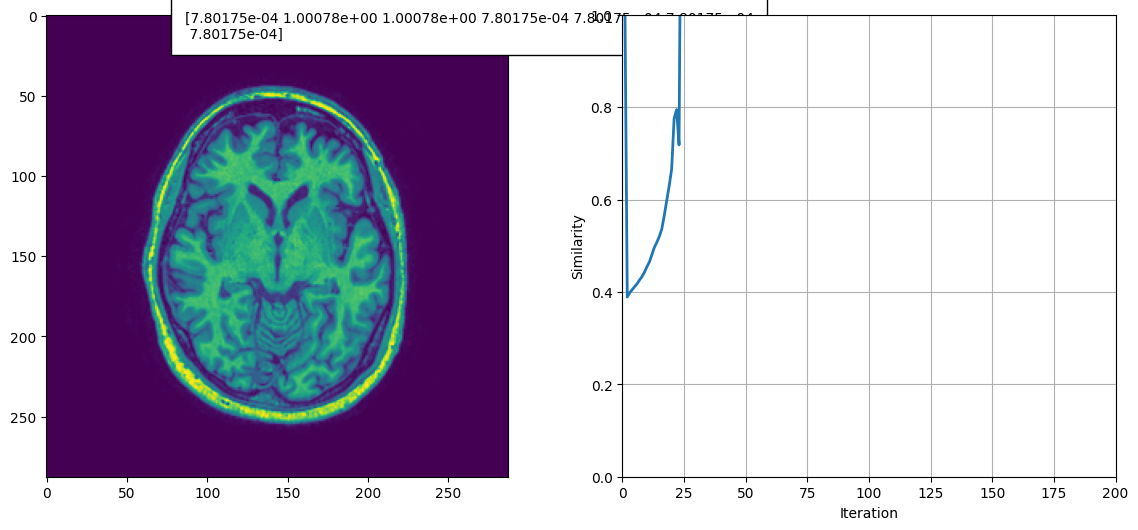

In [2]:
## 4: Affine intensity-based registration of two T1 slices (e.g. `1_1_t1.tif` and `1_1_t1_d.tif`) 
# using mutual information as a similarity measure.
import sys
sys.path.append("../code")
from registration_project import affine_reg_mi_demo

affine_reg_mi_demo('../data/image_data/1_1_t1.tif','../data/image_data/1_1_t1_d.tif')

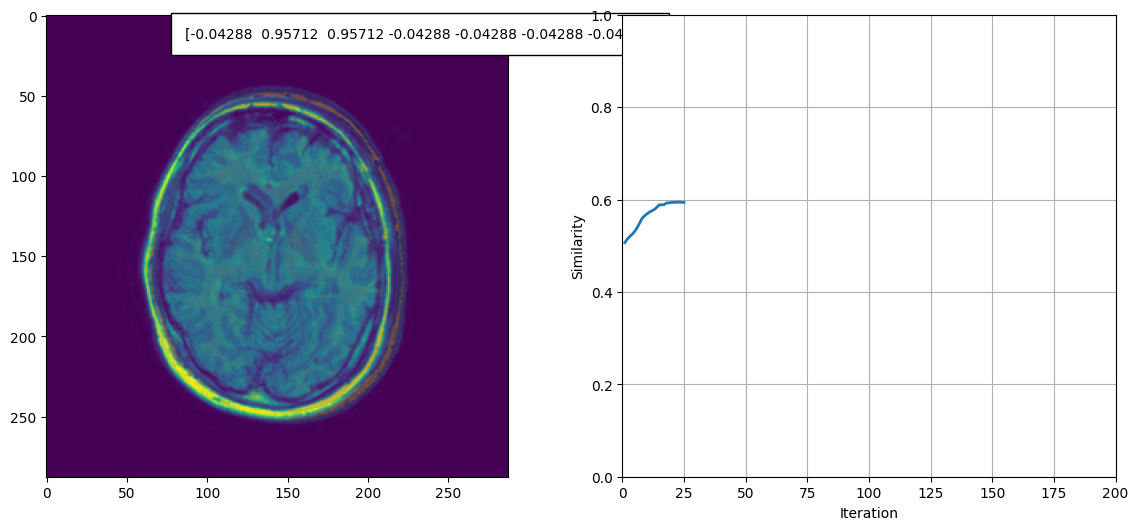

Final similarity of ca. 0.5940070280209866 with variance 8.062570123921589e-08


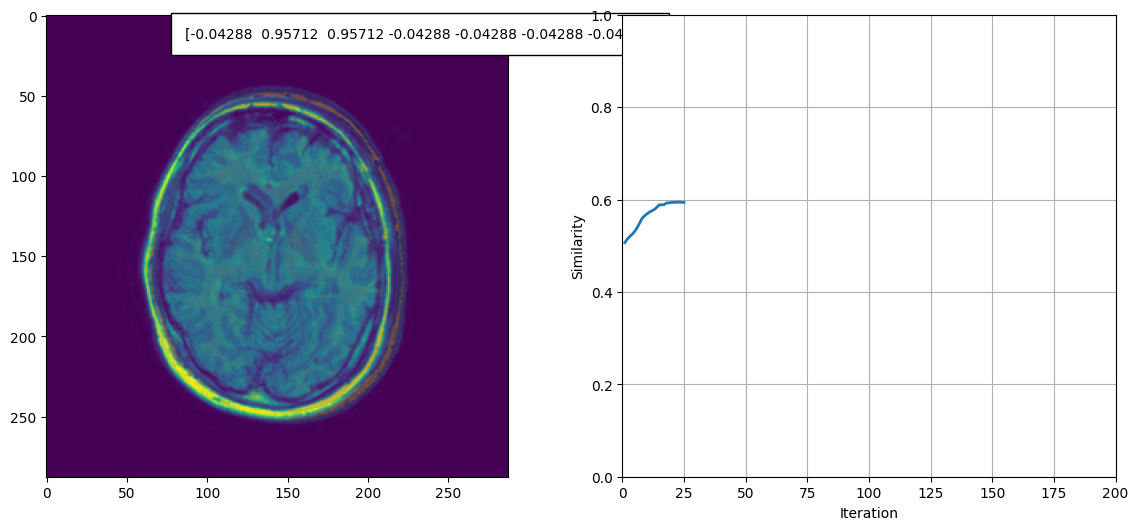

In [1]:
## 5: Affine intensity-based registration of a T1 slice and a T2 slice (e.g. `1_1_t1.tif` and `1_1_t2.tif`) 
# using mutual information as a similarity measure.

import sys
sys.path.append("../code")
from registration_project import affine_reg_mi_demo

affine_reg_mi_demo('../data/image_data/1_1_t1.tif','../data/image_data/1_1_t2.tif')